In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
matrix_data = pan.read_csv("lending_club_loan_two.csv")

In [3]:
info_data = pan.read_csv("lending_club_info.csv", index_col = "LoanStatNew")

In [4]:
matrix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

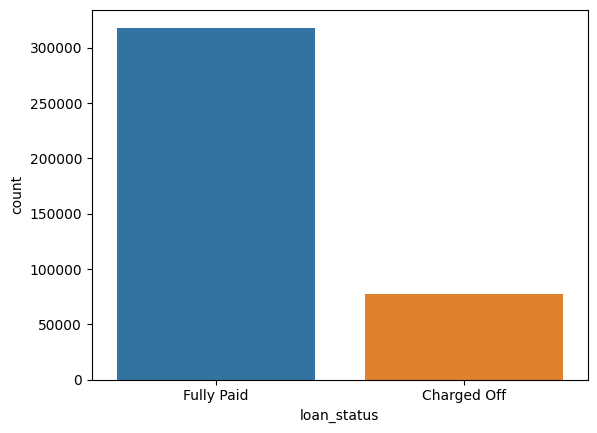

In [5]:
sns.countplot(x = matrix_data["loan_status"])

<Axes: xlabel='loan_amnt', ylabel='Count'>

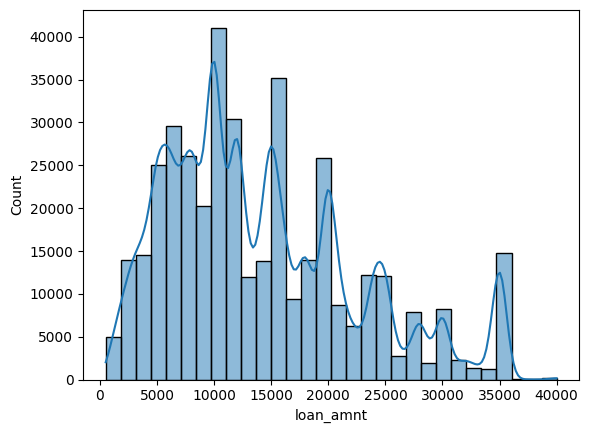

In [6]:
sns.histplot(x = matrix_data["loan_amnt"], bins = 30, kde = True)

<Axes: >

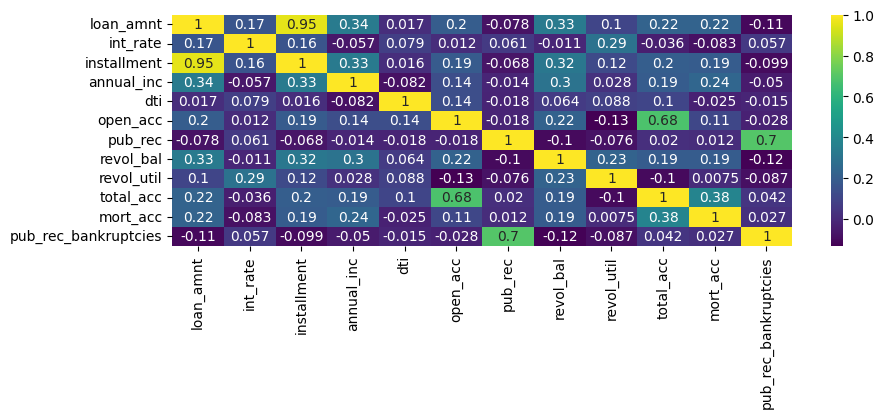

In [7]:
plotter.figure(figsize = (10, 3))
sns.heatmap(matrix_data.corr(numeric_only = True), annot = True, cmap = "viridis")

In [8]:
info_data.loc["installment"]["Description"]

'The monthly payment owed by the borrower if the loan originates.'

In [9]:
info_data.loc["loan_amnt"]["Description"]

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

<Axes: xlabel='installment', ylabel='loan_amnt'>

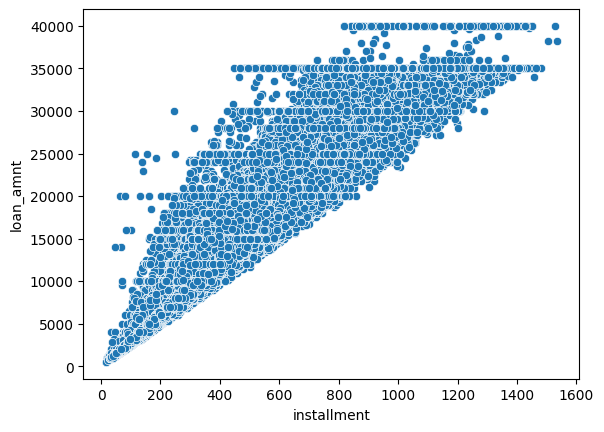

In [10]:
sns.scatterplot(x = matrix_data["installment"], y = matrix_data["loan_amnt"])

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

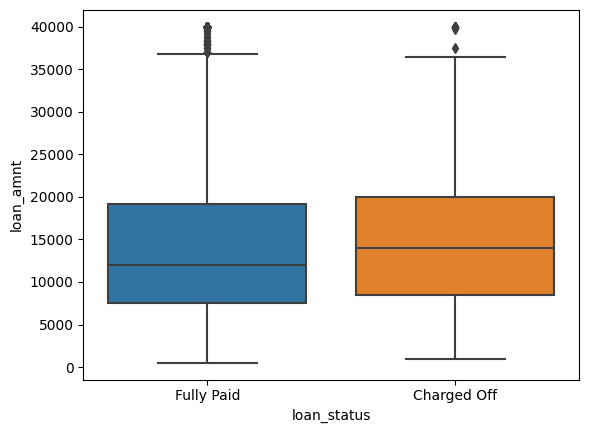

In [11]:
sns.boxplot(x = matrix_data["loan_status"], y = matrix_data["loan_amnt"])

In [19]:
matrix_data[["loan_status", "loan_amnt"]].groupby("loan_status").describe()

loan_amnt                                                       
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0  \
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

In [20]:
matrix_data["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [22]:
matrix_data["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

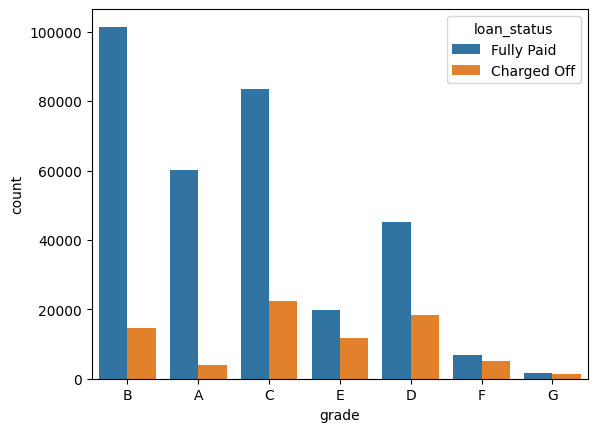

In [23]:
sns.countplot(x = matrix_data["grade"], hue = matrix_data["loan_status"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'B4'),
  Text(1, 0, 'B5'),
  Text(2, 0, 'B3'),
  Text(3, 0, 'A2'),
  Text(4, 0, 'C5'),
  Text(5, 0, 'C3'),
  Text(6, 0, 'A1'),
  Text(7, 0, 'B2'),
  Text(8, 0, 'C1'),
  Text(9, 0, 'A5'),
  Text(10, 0, 'E4'),
  Text(11, 0, 'A4'),
  Text(12, 0, 'A3'),
  Text(13, 0, 'D1'),
  Text(14, 0, 'C2'),
  Text(15, 0, 'B1'),
  Text(16, 0, 'D3'),
  Text(17, 0, 'D5'),
  Text(18, 0, 'D2'),
  Text(19, 0, 'E1'),
  Text(20, 0, 'E2'),
  Text(21, 0, 'E5'),
  Text(22, 0, 'F4'),
  Text(23, 0, 'E3'),
  Text(24, 0, 'D4'),
  Text(25, 0, 'G1'),
  Text(26, 0, 'F5'),
  Text(27, 0, 'G2'),
  Text(28, 0, 'C4'),
  Text(29, 0, 'F1'),
  Text(30, 0, 'F3'),
  Text(31, 0, 'G5'),
  Text(32, 0, 'G4'),
  Text(33, 0, 'F2'),
  Text(34, 0, 'G3')])

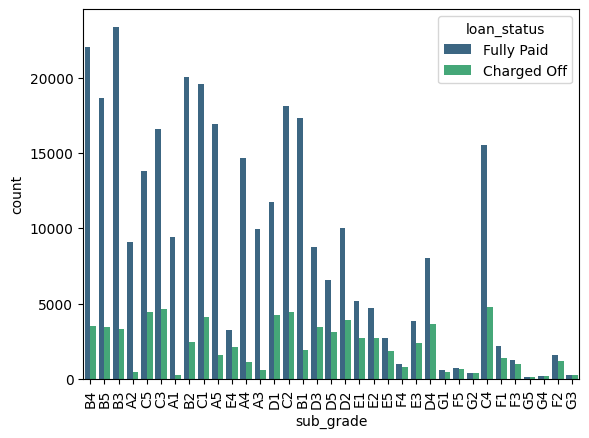

In [26]:
sns.countplot(x = matrix_data["sub_grade"], hue = matrix_data["loan_status"], palette = "viridis")
plotter.xticks(rotation = 90)

<Axes: xlabel='sub_grade', ylabel='count'>

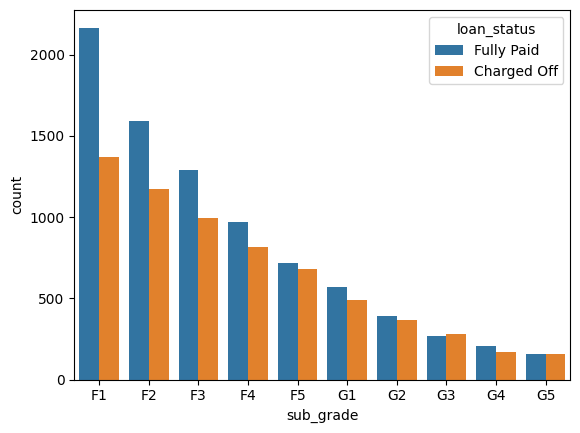

In [34]:
#F and G subgrades
fg_subgrades_data = matrix_data[(matrix_data["grade"] =="F") | (matrix_data["grade"] == "G")]
sns.countplot(x = fg_subgrades_data["sub_grade"].sort_values(), hue = matrix_data["loan_status"])

In [35]:
def status(x):
    if x == "Fully Paid":
        return 1
    else:
        return 0
matrix_data["loan_repaid"] = np.vectorize(status)(matrix_data["loan_status"])

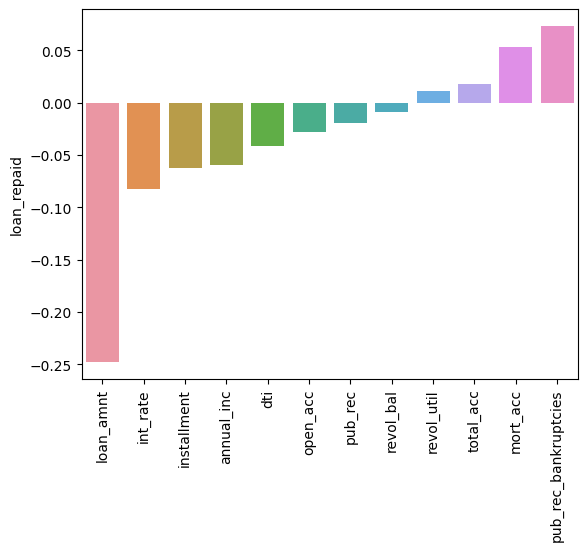

In [45]:
sns.barplot(x = matrix_data.select_dtypes(np.number).columns.drop("loan_repaid"), y = matrix_data.corr(numeric_only = True)["loan_repaid"].sort_values()[: -1])
plotter.xticks(rotation = 90);

In [46]:
len(matrix_data)

396030

In [48]:
matrix_data.isna().sum()/len(matrix_data) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [49]:
matrix_data.drop("emp_title", axis = 1, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1 year'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '< 1 year')])

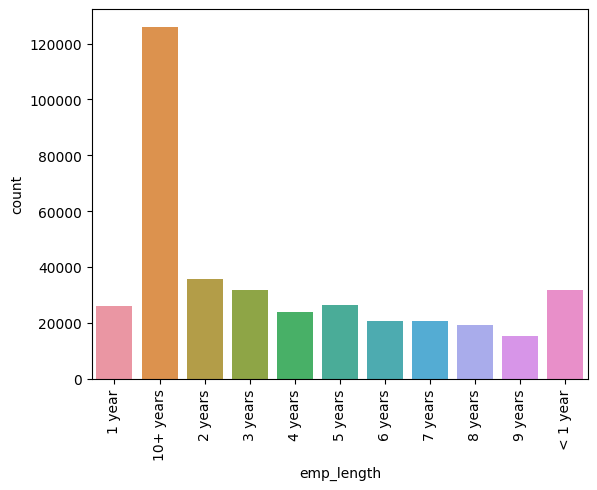

In [51]:
sns.countplot(x = matrix_data["emp_length"].sort_values())
plotter.xticks(rotation = 90)